# **Trabalho Prático 3: Métodos Numéricos (M2039)**
### 

**Autores:**

*   Eduardo Moura - up202406710
*   Filipe Zheng - up202406753
*   João Azevedo - up202404140
*   Manuel Mota - up202403543

## **Introdução**

## **Exercício 1:**

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return x**2 + np.sin(6*x)

In [7]:
#a)
x_pontos = np.linspace(-1,1,8)
y_pontos = f(x_pontos)
print(x_pontos)
print(y_pontos)

[-1.         -0.71428571 -0.42857143 -0.14285714  0.14285714  0.42857143
  0.71428571  1.        ]
[ 1.2794155   1.42055103 -0.35609671 -0.7355672   0.77638353  0.72344365
 -0.40014286  0.7205845 ]


In [ ]:
#b)
def lagrange_interpolation(x_points, y_points, x_eval):
    n = len(x_points)
    result = 0.0
    
    for k in range(n):
        # Calcula o termo l_k(x)
        l_k = 1.0
        for i in range(n):
            if i != k:
                # Fórmula do produto (Slide 90)
                l_k *= (x_eval - x_points[i]) / (x_points[k] - x_points[i])
        
        # Soma ponderada
        result += l_k * y_points[k]
        
    return result

def diferencas_divididas(x_points, y_points):
    n = len(x_points)
    coef = np.zeros([n, n])
    # A primeira coluna são os valores de y
    coef[:, 0] = y_points
    
    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x_points[i + j] - x_points[i])
            
    return coef[0, :] # Retorna a primeira linha (coeficientes a0, a1, ...)

def newton_slides(coef, x_points, x_eval): #perguntar ao stor se ganhase alguma coisa em usar isto ou o de lagrange (diferencas na eficiencia)
    n = len(coef)
    p = coef[0]

    for k in range(1, n):
        termo = coef[k]
        for j in range(k):
            termo *= (x_eval - x_points[j])
        p += termo
    return p
    
def newton_poly(coef, x_points, x_eval):
    #Avalia o polinómio de Newton num ponto x_eval.
    n = len(x_points) - 1 
    p = coef[n]
    for k in range(1, n + 1):
        p = coef[n - k] + (x_eval - x_points[n - k]) * p
    return p

coef = diferencas_divididas(x_pontos, y_pontos)

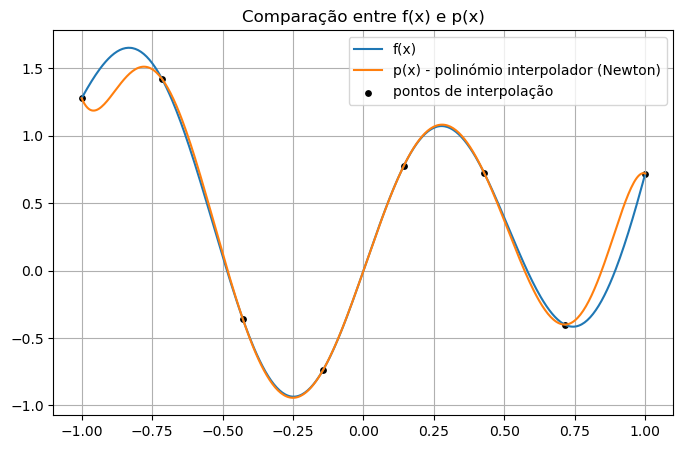

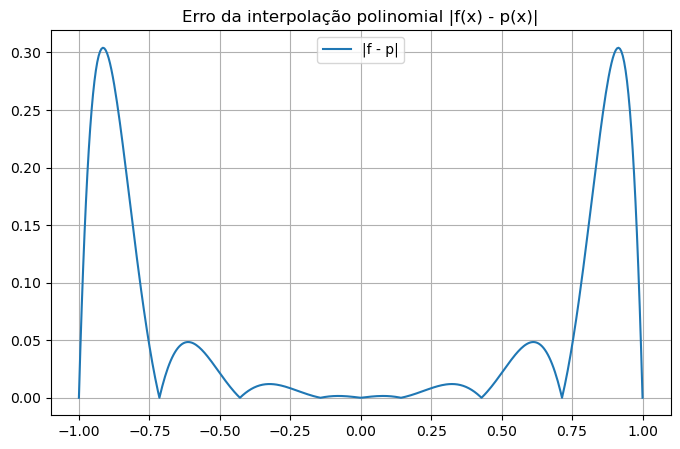

In [12]:
xx = np.linspace(-1, 1, 400)

# Avaliar f
ff = f(xx)

# Avaliar o polinómio interpolador de Newton em cada ponto
pp = np.array([ newton_poly(coef, x_pontos, x) for x in xx ])

# Gráfico f vs p
plt.figure(figsize=(8,5))
plt.plot(xx, ff, label="f(x)")
plt.plot(xx, pp, label="p(x) - polinómio interpolador (Newton)")
plt.scatter(x_pontos, y_pontos, color="black", s=15, label="pontos de interpolação")
plt.legend()
plt.grid(True)
plt.title("Comparação entre f(x) e p(x)")
plt.show()

# Gráfico do erro |f - p|
erro_p = np.abs(ff - pp)

plt.figure(figsize=(8,5))
plt.plot(xx, erro_p, label="|f - p|")
plt.grid(True)
plt.title("Erro da interpolação polinomial |f(x) - p(x)|")
plt.legend()
plt.show()

In [14]:
def spline_cubico_natural(x_points, y_points, x_eval):

    N = len(x_points) - 1
    h = np.diff(x_points) # h_i = x_i - x_{i-1}
    
    # 1. Montagem do Sistema Linear A * M = b para encontrar M (segundas derivadas)
    # Dimensão do sistema interno é (N-1) pois M_0=0 e M_N=0
    A = np.zeros((N-1, N-1))
    b = np.zeros(N-1)
    
    for i in range(1, N):
        idx = i - 1 
        
        # Lado direito da equação (diferenças divididas)
        term1 = (y_points[i+1] - y_points[i]) / h[i]
        term2 = (y_points[i] - y_points[i-1]) / h[i-1]
        b[idx] = term1 - term2
        
        # Diagonal Principal: (h_i + h_{i+1}) / 3
        A[idx, idx] = (h[i-1] + h[i]) / 3
        
        # Diagonais secundárias
        if idx > 0:
            A[idx, idx-1] = h[i-1] / 6
        if idx < N-2:
            A[idx, idx+1] = h[i] / 6
            
    # Resolver para M (nos pontos interiores)
    M_interior = np.linalg.solve(A, b)
    
    # Adicionar condições de fronteira natural M0=0, Mn=0 (Slide 113)
    M = np.concatenate(([0], M_interior, [0]))
    
    # 2. Avaliação do Spline no ponto x_eval
    # Encontrar em qual intervalo [x_{i-1}, x_i] o ponto x_eval está
    for i in range(1, N + 1):
        if x_points[i-1] <= x_eval <= x_points[i]:
            xi_1 = x_points[i-1]
            xi = x_points[i]
            fi_1 = y_points[i-1]
            fi = y_points[i]
            hi = h[i-1]
            Mi_1 = M[i-1]
            Mi = M[i]
            
            # Fórmula do polinómio S_i(x)
            term_M1 = Mi_1 * (xi - x_eval)**3 / (6 * hi)
            term_M2 = Mi * (x_eval - xi_1)**3 / (6 * hi)
            term_F1 = (fi_1 - Mi_1 * hi**2 / 6) * (xi - x_eval) / hi
            term_F2 = (fi - Mi * hi**2 / 6) * (x_eval - xi_1) / hi
            
            return term_M1 + term_M2 + term_F1 + term_F2
            
    return None # Fora do intervalo


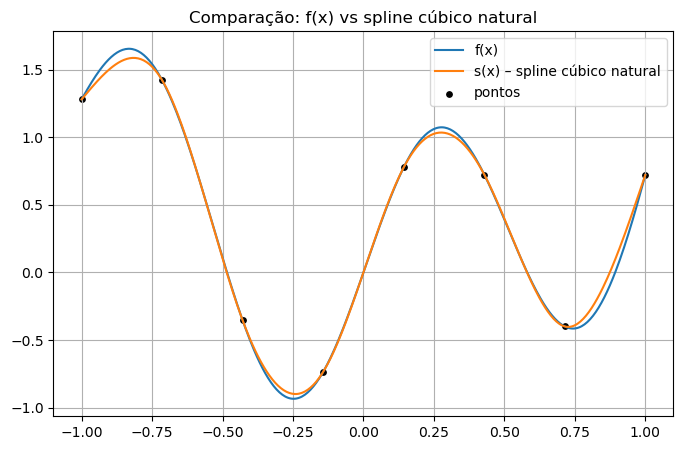

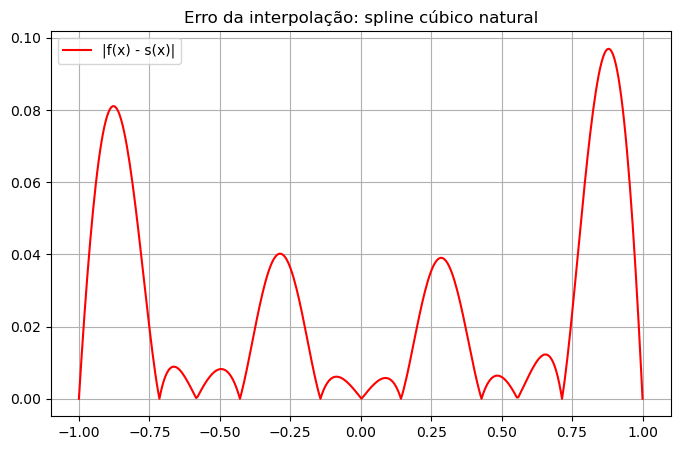

In [15]:
ss = np.array([spline_cubico_natural(x_pontos, y_pontos, x) for x in xx])

# ============= Gráfico f(x) vs s(x) =================

plt.figure(figsize=(8,5))
plt.plot(xx, ff, label="f(x)")
plt.plot(xx, ss, label="s(x) – spline cúbico natural")
plt.scatter(x_pontos, y_pontos, color="black", s=15, label="pontos")
plt.grid(True)
plt.legend()
plt.title("Comparação: f(x) vs spline cúbico natural")
plt.show()

# ============= Erro |f - s| ========================

erro_s = np.abs(ff - ss)

plt.figure(figsize=(8,5))
plt.plot(xx, erro_s, color="red", label="|f(x) - s(x)|")
plt.grid(True)
plt.legend()
plt.title("Erro da interpolação: spline cúbico natural")
plt.show()